In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [4]:
# First let's find all of our data
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
dataPath = ipyPath + '/all_data'

# Go to the correct parent directory
os.chdir(ipyPath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)

In [5]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [6]:
# You want to load the data in so that it's sorted to begin with
paList = []
pbList = []
prList = []
xaList = []
for i in xrange(numFiles):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
    pbList.append(getFromTxt(txtFiles[i], "pb", "_xa"))
    xaList.append(getFromTxt(txtFiles[i], "xa", "_ep"))
    # We want to use ratios rounded to nearest 0.05
    tmpPeR = round(paList[i]/pbList[i] * 2, 1) / 2
    prList.append(tmpPeR)
    
# Now sort the array of txtFile names
indArr = multiSort(prList, paList, xaList)
indSort(txtFiles, indArr)

In [7]:
# Read in the data in pandas dataframes
all_sims = []
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(ipyPath)

In [8]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(txtFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa0_pb500_xa10_ep82.txt sorted... 
diam_pa0_pb500_xa20_ep82.txt sorted... 
diam_pa0_pb500_xa30_ep82.txt sorted... 
diam_pa0_pb500_xa40_ep82.txt sorted... 
diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb500_xa60_ep82.txt sorted... 
diam_pa0_pb500_xa70_ep82.txt sorted... 
diam_pa0_pb500_xa80_ep82.txt sorted... 
diam_pa0_pb500_xa90_ep82.txt sorted... 
diam_pa10_pb100_xa50_ep18.txt sorted... 
diam_pa20_pb200_xa50_ep34.txt sorted... 
diam_pa30_pb300_xa50_ep50.txt sorted... 
diam_pa40_pb400_xa50_ep66.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa60_pb600_xa50_ep98.txt sorted... 
diam_pa70_pb700_xa50_ep114.txt sorted... 
diam_pa80_pb800_xa50_ep130.txt sorted... 
diam_pa90_pb900_xa50_ep146.txt sorted... 
diam_pa100_pb1000_xa50_ep162.txt sorted... 
diam_pa110_pb1100_xa50_ep178.txt sorted... 
diam_pa120_pb1200_xa50_ep194.txt sorted... 
diam_pa130_pb1300_xa50_ep210.txt sorted... 
diam_pa140_pb1400_xa50_ep226.txt sorted... 
diam_pa150_pb1500_xa50_ep242.txt sorted... 
diam

diam_pa110_pb122_xa50_ep21.txt sorted... 
diam_pa120_pb133_xa50_ep23.txt sorted... 
diam_pa130_pb144_xa50_ep25.txt sorted... 
diam_pa140_pb155_xa50_ep26.txt sorted... 
diam_pa150_pb166_xa50_ep28.txt sorted... 
diam_pa450_pb500_xa50_ep82.txt sorted... 
diam_pa500_pb500_xa50_ep82.txt sorted... 


In [9]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
for i in xrange(numFiles):
    # New column for number of clusters
    all_sims[i]['nClust'] = all_sims[i]['Dense_tot'] / all_sims[i]['MCS']
    # Ger rid of NaN in favor of 0
    all_sims[i].fillna(0, inplace=True)

# display(all_sims[0])

In [10]:
# Function that will sort wrt one variable
def singleSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                arr[i], arr[j] = arr[j], arr[i]
                
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    # This is actually indpendent of runtime :)
    sigma = 1.0
    threeEtaPiSigma = 1.0
    runFor = 200
    tauBrown = 1.0
    
    tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
    dt = 0.00001 * tauLJ
    simLength = runFor * tauBrown
    totTsteps = int(simLength / dt)
    tstepPerTau = int(totTsteps / float(simLength))
    return tstepPerTau

def theoryDenom(xS, peS, peF):
    xS /= 100.0
    xF = 1.0 - xS
    return 4.0 * ((xS * peS) + (xF * peF))

# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in xrange(numFiles):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    theory = theoryDenom(xa, pa, pb)
    
    try:
        # Round to the nearest tenths place
        prat = round(float(pa)/float(pb) * 2, 1) / 2
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT, theory))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps', 'brownTime', 'theory'])
# display(params)

Number of textfiles before delete: 205
Number of all_sims dataframes before delete: 205
Params rows before delete: 205
Number of textfiles after delete: 200
Number of all_sims dataframes after delete: 200
Params rows after delete: 200


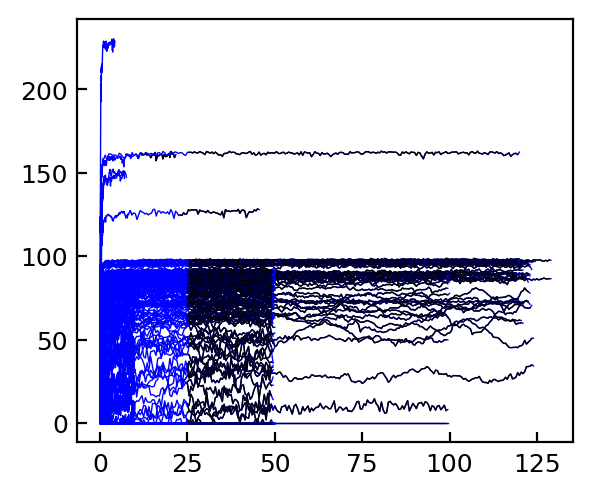

In [15]:
# Figure out how what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Make sure files have correct number of columns:
for i in xrange(numFiles):
    if len(all_sims[i].iloc[1]) != 22:
        print("ERROR: {}").format(txtFiles[i])
        badFiles.append(i)

# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    for i in xrange(len(badFiles)):
        del txtFiles[badFiles[i]]
        del all_sims[badFiles[i]]
    params.drop(badFiles, axis=0, inplace=True)
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))

numFiles = len(txtFiles)
del badFiles[:]

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
        
plt.show()

In [12]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

[0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0]
[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


In [13]:
# Now get time-based steady state values


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,30.7155,2.59354,5.40573,69.2845,97.4065,94.5943,69.2251,97.3411,94.5295,91.7081,...,1.00015,1.00011,1.0001,0.6,74258.8,74309.6,1.27,1.27,0.0963265,1.06122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.87788,1.88735,1.88261,98.1221,98.1127,98.1174,98.1221,98.1127,98.1174,98.1174,...,1.00003,1.00005,1.00006,0.6,77067.7,77067.7,1.27,1.27,0.0355102,1


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,2.75791,0.420863,0.520623,2.75791,0.420863,0.520623,2.76533,0.527578,0.612039,11.3932,...,0.000282194,0.000142624,0.000106904,5.55112e-16,483.852,410.23,1.33227e-15,1.33227e-15,0.00940991,0.239743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.307774,0.288665,0.296204,0.307774,0.288665,0.296204,0.307774,0.288665,0.296204,0.296204,...,0.000127416,0.000110845,0.00012289,5.55112e-16,237.52,237.52,1.33227e-15,1.33227e-15,0.0060815,0


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,760.609,159.413,271.049,760.609,159.413,271.049,764.703,250.505,374.591,129804,...,7.96335e-08,2.03415e-08,1.14286e-08,3.08149e-31,234113,168289,1.77494e-30,1.77494e-30,8.85464e-05,0.0574769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,47.3624,41.6639,87.7366,47.3624,41.6639,87.7366,47.3624,41.6639,87.7366,87.7366,...,1.62349e-08,1.22865e-08,1.5102e-08,3.08149e-31,56415.9,56415.9,1.77494e-30,1.77494e-30,3.69846e-05,0


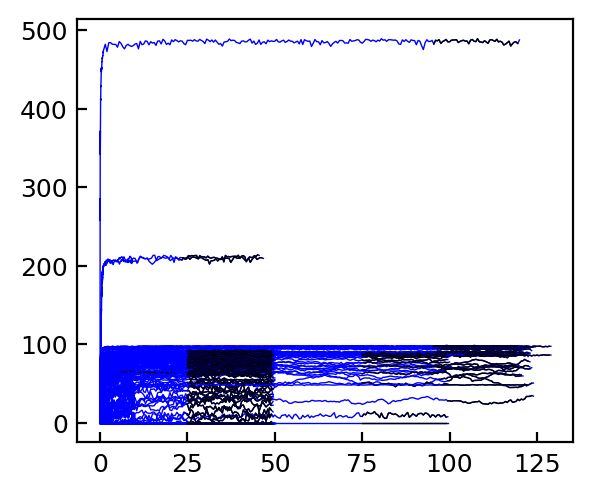

In [14]:
# Figure out how what we should use for steady-state

# How many frames to average over for steady-state
avgOver = 50

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of last avgOver entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-avgOver:-1,j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[-avgOver:-1,j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

# Get an idea for what section of the data we are averaging over
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][-avgOver:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][-avgOver:-1] / params['partA'][i] * 100.0,
             c='k')
        
plt.show()